<a href="https://colab.research.google.com/github/rajeevfromkrec/NLP/blob/master/1T_Word_2_vec_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [48]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels



In [52]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Traspose relationship
        self.W = nn.Linear(voc_size, embedding_size, bias=False) # voc_size > embedding_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False) # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = self.W(X) # hidden_layer : [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer) # output_layer : [batch_size, voc_size]
        return output_layer




In [6]:
batch_size=2
embedding_size=2
sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]

In [16]:
word_sequence=" ".join(sentences).split()

In [17]:
print(type(word_sequence))
word_sequence

<class 'list'>


['apple',
 'banana',
 'fruit',
 'banana',
 'orange',
 'fruit',
 'orange',
 'banana',
 'fruit',
 'dog',
 'cat',
 'animal',
 'cat',
 'monkey',
 'animal',
 'monkey',
 'dog',
 'animal']

In [21]:
word_list=" ".join(sentences).split()
word_list=list(set(word_list))
word_dict={w:i for i,w in enumerate(word_list)}
voc_size=len(word_list)

In [24]:
skip_grams=[]

for i in range(1,len(word_sequence)-1):
  target=word_dict[word_sequence[i]]
  context=(word_dict[word_sequence[i-1]] ,word_dict[word_sequence[i+1]])
  for w in context :
    skip_grams.append([target,w])
    
  

In [25]:
skip_grams[:10]

[[1, 0],
 [1, 5],
 [5, 1],
 [5, 1],
 [1, 5],
 [1, 3],
 [3, 1],
 [3, 5],
 [5, 3],
 [5, 3]]

In [54]:
model=Word2Vec()

In [29]:
model

word2vec(
  (w): Linear(in_features=8, out_features=2, bias=False)
  (wt): Linear(in_features=2, out_features=8, bias=False)
)

In [31]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [56]:
for epoch in range(5000):
  input_batch, target_batch=random_batch()
  input_batch = torch.Tensor(input_batch)
  target_batch = torch.LongTensor(target_batch)
  optimizer.zero_grad()

  output=model(input_batch)

  loss=criterion(output,target_batch)
  if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
  loss.backward()
  optimizer.step()




Epoch: 1000 cost = 2.174676
Epoch: 2000 cost = 2.018088
Epoch: 3000 cost = 2.097383
Epoch: 4000 cost = 2.184577
Epoch: 5000 cost = 2.188621


In [50]:
input_batch

tensor([[0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [51]:
target_batch

tensor([2, 4])

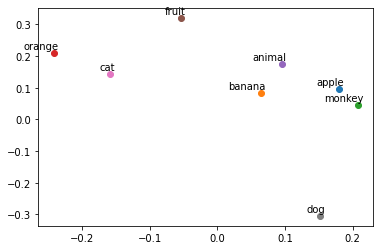

In [58]:
for i, label in enumerate(word_list):
  W, WT = model.parameters()
  x, y = W[0][i].item(), W[1][i].item()
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()